# Project01

Jen Lee & Isabel Osgood

## Experiment Objective

Our experiment attempts to answer the age-old controversy ‘Who is the best basketball player of all time?’. Well, not really. We are going to use the NBA career stats of Michael Jordan, Kobe Bryant, and Lebron James to create a classification algorithm for each of the basketball greats. In a way, we are testing to see if we can build an algorithm to find a difference between these players stats. 

### Data Source

We were able to get a dataset of the advanced stats of James, Jordan, and Bryant from Kaggle where the dataset was listed as being public domain.

The dataset can be found [here](https://www.kaggle.com/xvivancos/michael-jordan-kobe-bryant-and-lebron-james-stats) and the Terms of Use can be found [here](https://www.kaggle.com/terms). Section 5 states that we promise to abide by "all copyright notices, trademark rules, information, and restrictions contained in any Content you access through the Services." but because we have no plans to exploit this content andnin addition to most NBA data being widely available there is no ethical restrictions in using this data.

## Data Collection


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load in the data from a saved csv file
bball = pd.read_csv('advanced_stats.csv')

# Print head to show success
bball.head()

,Season,Age,Tm,Lg,Pos,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Player,RSorPO
0,2003-04,19,CLE,NBA,SG,79,3122,18.3,0.488,0.145,...,2.4,2.6,5.1,0.078,2.2,-0.2,1.9,3.1,Lebron James,Regular Season
1,2004-05,20,CLE,NBA,SF,80,3388,25.7,0.554,0.183,...,9.7,4.6,14.3,0.203,6.9,1.5,8.3,8.8,Lebron James,Regular Season
2,2005-06,21,CLE,NBA,SF,79,3361,28.1,0.568,0.208,...,12.0,4.3,16.3,0.232,7.9,1.4,9.3,9.5,Lebron James,Regular Season
3,2006-07,22,CLE,NBA,SF,78,3190,24.5,0.552,0.191,...,8.0,5.7,13.7,0.206,5.4,2.0,7.4,7.6,Lebron James,Regular Season
4,2007-08,23,CLE,NBA,SF,75,3027,29.1,0.568,0.219,...,10.7,4.6,15.2,0.242,9.0,2.3,11.2,10.1,Lebron James,Regular Season


## Data Preprocessing

The data contains 29 columns, and __ were dropped for the follwoing reasons:

* Season - a baises variables, as the machine would quickly learn what time range of each player 

* Age - again biases, Kobe is the only player with data at age 18 while Jordan had the longest career, playing until 40. To reserve data it was best to eliminate 

* Team - also a biased variable

* Lg - dropped because every row says NBA, thus useless

* Pos - biased variable

For the following dropped variables, we consulted a basketball expert who explained how each stat is measured and what it truely says about a players performance. 

* OWS, DWS, WS/48 (Offensive Win Shares), (Defensive Win Shares), (Win Shares Per 48 Minutes) - The way these are calculated we felt was repetatitve of Total Win Shares and to keep all four features would be unnecessary. 


* OBPM (Offensive Box Plus/Minus), DBPM (Defensive Box Plus/Minus) - This is calcuated very similarly to WS and only the combined BPM scores was kept. 

* RSorPO (Regular Season or Playoffs) - Because this is a team not individual statistic it was dropped. 


| Player | Classification |
| ----------- | ----------- |
| Kobe Bryan | 0 |
| Lebron James | 1 |
| Michael Jordan | 2 | 


In [3]:
bball.drop(bball.iloc[:, 0:5], inplace = True, axis = 1)
bball.drop(['OWS', 'DWS', 'WS/48', 'OBPM', 'DBPM', 'RSorPO'], axis = 1, inplace = True)


bball.isnull().values.any()

# convert classes (players) to integers 
class_mapping = {label: idx for idx, label in enumerate(np.unique(bball['Player']))}
class_mapping
bball['Player'] = bball['Player'].map(class_mapping)

# Print head to show success
bball.head()

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,WS,BPM,VORP,Player
0,79,3122,18.3,0.488,0.145,0.308,3.5,11.8,7.6,27.8,2.2,1.3,13.9,28.2,5.1,1.9,3.1,1
1,80,3388,25.7,0.554,0.183,0.378,3.8,17.0,10.2,32.9,2.8,1.1,11.8,29.7,14.3,8.3,8.8,1
2,79,3361,28.1,0.568,0.208,0.447,2.6,17.1,9.8,32.8,2.0,1.5,10.7,33.6,16.3,9.3,9.5,1
3,78,3190,24.5,0.552,0.191,0.432,3.0,16.6,9.6,29.1,2.1,1.3,11.5,31.0,13.7,7.4,7.6,1
4,75,3027,29.1,0.568,0.219,0.470,4.9,17.8,11.1,37.3,2.4,2.1,11.4,33.5,15.2,11.2,10.1,1


### Test Train Split

**TODO: Inclde training vs test decisions**

In [4]:
from sklearn.model_selection import train_test_split

X, y = bball.iloc[:, 0:16].values, bball.iloc[:, 17].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)


### Feature Selection

**TODO: Include decision on what features to add to model**

 1) 3PAr                           0.163660
 2) BPM                            0.151492
 3) DRB%                           0.150320
 4) TRB%                           0.140267
 5) STL%                           0.076613
 6) PER                            0.066969
 7) ORB%                           0.045354
 8) TOV%                           0.041698
 9) AST%                           0.041419
10) USG%                           0.034493
11) BLK%                           0.022750
12) FTr                            0.015986
13) TS%                            0.015539
14) WS                             0.013220
15) MP                             0.010673
16) G                              0.009546


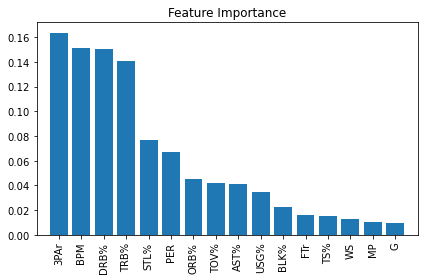

In [5]:
#select features using random forest
from sklearn.ensemble import RandomForestClassifier

feat_labels = bball.columns[:16]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

plt.show()

In [25]:
print(bball.groupby(['Player'])['3PAr'].mean())
print(bball.groupby(['Player'])['BPM'].mean())
print(bball.groupby(['Player'])['DRB%'].mean())
print(bball.groupby(['Player'])['TRB%'].mean())

Player
0    0.213714
1    0.220241
2    0.079571
Name: 3PAr, dtype: float64
Player
0     3.037143
1    10.062069
2     8.653571
Name: BPM, dtype: float64
Player
0    12.311429
1    19.486207
2    13.950000
Name: DRB%, dtype: float64
Player
0     7.722857
1    11.858621
2     9.325000
Name: TRB%, dtype: float64


In [6]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

features = []
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))
    # Keek track of feature indices
    features.append(indices[f])
    
# TODO: Delete later
print(features)

Number of features that meet this threshold criterion: 4
 1) 3PAr                           0.163660
 2) BPM                            0.151492
 3) DRB%                           0.150320
 4) TRB%                           0.140267
[4, 15, 7, 8]


## Model Selection

### Classification Algorithm 1: K Nearest Neighbor


In [7]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Original training set accuracy
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.5
Test accuracy: 0.42857142857142855


In [8]:
# Accuracy with __ most relevant features
knn.fit(X_train[:, features], y_train)
print('Training accuracy:', knn.score(X_train[:, features], y_train))
print('Test accuracy:', knn.score(X_test[:, features], y_test))

Training accuracy: 0.875
Test accuracy: 0.7857142857142857


### Classification Algorithm 2: Multiclass Logistic Regression

In [9]:
from matplotlib.colors import ListedColormap

# Function taken from examples/ch05
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    labels = ('Bryant', 'James', 'Jordan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=labels[cl])

In [10]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

# Use PCA to reduce the dimension of X
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr.fit(X_train_pca, y_train)

print(lr.score(X_train_pca, y_train)) #training accuracy 
lr.score(X_test_pca, y_test) #test accuracy 

# Plot Train
# plot_decision_regions(X_train_pca, y_train, classifier=lr)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.legend(loc='lower left')
# plt.tight_layout()
# plt.show()

0.71875


0.7142857142857143

In [ ]:
# # Plot Test 
# plot_decision_regions(X_test_pca, y_test, classifier=lr)
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.legend(loc='lower left')
# plt.tight_layout()
# plt.show()

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=16, 
                                random_state=1,
                                n_jobs=2)
rf = forest.fit(X_train, y_train)

print(rf.score(X_train, y_train)) #training accuracy
print(rf.score(X_test, y_test)) #test accuracy

1.0
0.9642857142857143


In [17]:
rf_sub = forest.fit(X_train[:, features], y_train)

print(rf_sub.score(X_train[:, features], y_train)) #training accuracy
print(rf_sub.score(X_test[:, features], y_test)) #test accuracy

1.0
0.9285714285714286


## Compare the Models 
   ### using confusion matrixes 

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

#KNN 
print('K-nearest Neighbor method:')
print('')
# Accuracy with __ most relevant features
knn.fit(X_train[:, features], y_train)
print('Training accuracy:', knn.score(X_train[:, features], y_train))
print('Test accuracy:', knn.score(X_test[:, features], y_test))

y_pred = knn.predict(X_test[:, features])

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average = 'macro'))

K-nearest Neighbor method:
Training accuracy: 0.875
Test accuracy: 0.7857142857142857
Precision: 0.852
Recall: 0.766
F1: 0.775


In [15]:
#Logistic Regression
print('Logisitic Regression:')
print('')
# Accuracy with __ most relevant features
lr.fit(X_train_pca, y_train)
print('Training accuracy:', lr.score(X_train_pca, y_train))
print('Test accuracy:', lr.score(X_test_pca, y_test))

y_pred = lr.predict(X_test_pca)

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average = 'macro'))

Logisitic Regression:

Training accuracy: 0.71875
Test accuracy: 0.7142857142857143
Precision: 0.711
Recall: 0.683
F1: 0.658


In [20]:
#Random Forest

print('Random Forest')
print('')
rf = forest.fit(X_train, y_train)

print('Training Accuracy:', rf.score(X_train, y_train)) #training accuracy
print('Test accuracy:', rf.score(X_test, y_test)) #test accuracy

y_pred = rf.predict(X_test)

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average = 'macro'))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average = 'macro'))

print('RANDOM FOREST WAS THE MOST SUCCESFUL MODEL FOR THIS PROBLEM')

Random Forest

Training Accuracy: 1.0
Test accuracy: 0.9642857142857143
Precision: 0.972
Recall: 0.963
F1: 0.966
RANDOM FOREST WAS THE MOST SUCCESFUL MODEL FOR THIS PROBLEM


## Experiment Summary

In the course of building our model, random forest was the most successful algorithm for this problem. Looking at the data post-hoc this makes sense because our classes do not have a defined linear divide. Using random forest, we were able to accurately model the differences between Kobe Bryant, Michael Jordan, and Lebron James. The accuracy of this model actaully exceeded our expectations. 
On a side note we took the 4 most important features (the features that meet the .10 threshold of feature importancce), and looked at each player's career average in those stats and LeBron James outperformed both Bryant and Jordan in all four metrics. 

Finish summary (idk what else there is to say?) More in depth about the models maybe 
We need say something about our train test split I think. 
Just reread the instructions and see if anything is missing?